In [1]:
import numpy as np
from scipy.optimize import root
from vpython import *
import math
import time


<IPython.core.display.Javascript object>

In [2]:
%run "C:\SBU-3\Jupyter-Research\RSCR\Functions.ipynb"

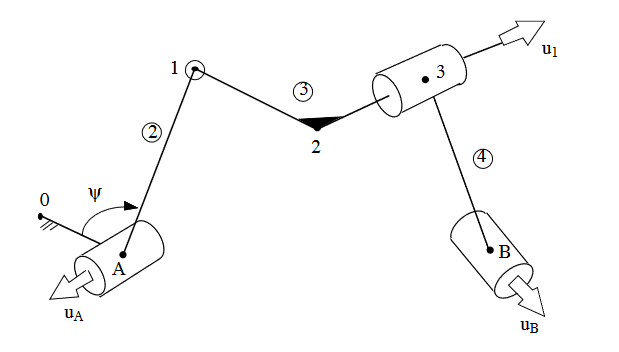

In [ ]:
# Fixed parameters, the order is 0,1,2,u1,u2
Fixed_para = np.array([
    [-1,0,0], #0 - fixed
    [0.26124984, -0.34487408, -1.62759972],  #1 - fixed
    [-0.2732265 ,  1.55609512, -3.65260601],  #2 - fixed
    [ 0.97530392,  0.21334773, -0.05714027],  #u1 - fixed
    [-0.89989856, -0.41033263, -0.14768114]   #u2 - fixed
]);


Initial_pos_3 = np.array([-0.00598834,  0.60561055, -2.64010286])
Initial_pos_4 = np.array([ 1.08431971, -2.16704273, -1.58009279])
Initial_u5 = np.array([-0.32498458, -0.17104471, -0.93012297])

config_para = ComputeConfig(Fixed_para, Initial_pos_3, Initial_pos_4, Initial_u5);



In [ ]:
mec_num = 1

Fixed_para = np.array([
    [-1,0,0], #0 - fixed
    [ -1,0,0],  #1 - fixed
    [ 8,0,0],  #2 - fixed
    [ -np.sqrt(2)/2, 0, np.sqrt(2)/2],  #u1 - fixed
    [np.sqrt(2)/2, 0, np.sqrt(2)/2 ]   #u2 - fixed
]);

fullyrotated_num = 0;
temp_count = 0;

step = 360; # this step decides how to devide 2pi
mec_data = np.zeros((mec_num*27,9,3), dtype=np.float64);
path_data = np.zeros((mec_num*27,step,3), dtype=np.float64);

Initial_pos_3 = np.array([1, 5, 0])
Initial_pos_4 = np.array([3, 4, 3 ])
Initial_u5 = np.array([np.sqrt(2)/2,0,-np.sqrt(2)/2])
#Initial_u5 = Initial_u5/np.linalg.norm(Initial_u5)

config_para = ComputeConfig(Fixed_para, Initial_pos_3, Initial_pos_4, Initial_u5);
print(config_para)

In [ ]:
mec_num = 1

Fixed_para = np.array([
    [-1,0,0], #0 - fixed
    [ 0,0,0],  #1 - fixed
    [ 5,0,0],  #2 - fixed
    [ 0,0,1],  #u1 - fixed
    [np.sqrt(2)/2,0,  np.sqrt(2)/2  ]   #u2 - fixed
]);

fullyrotated_num = 0;
temp_count = 0;

step = 360; # this step decides how to devide 2pi
mec_data = np.zeros((mec_num*27,9,3), dtype=np.float64);
path_data = np.zeros((mec_num*27,step,3), dtype=np.float64);

Initial_pos_3 = np.array([0, 2, 0])
Initial_pos_4 = np.array([ 3, 4,  0 ])
Initial_u5 = np.array([np.sqrt(2)/2, 1/2,1/2])
#Initial_u5 = Initial_u5/np.linalg.norm(Initial_u5)

config_para = ComputeConfig(Fixed_para, Initial_pos_3, Initial_pos_4, Initial_u5);
print(config_para)

In [ ]:
scene = canvas(width=800,height=500,center=vector(0,4,0),background=color.white);


new_pos_3 = Initial_pos_3;
upara = Initial_para;
#frame
#x_arrow = arrow(pos=vector(0,0,0), axis=vector(10,0,0), shaftwidth=0.2, color=color.red, opacity=0.4); #x
#label(pos=vector(10,0,0), text ='x', xoffset=-2, yoffset=5);
#y_arrow = arrow(pos=vector(0,0,0), axis=vector(0,10,0), shaftwidth=0.2, color=color.green, opacity=0.4); #y
#label(pos=vector(0,10,0), text ='y', xoffset=-2, yoffset=5);
#z_arrow = arrow(pos=vector(0,0,0), axis=vector(0,0,10), shaftwidth=0.2, color=color.blue, opacity=0.4); #z
#label(pos=vector(0,0,10), text ='z', xoffset=-2, yoffset=5);

#joint 1 - fixed joint
joint_f1_front = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(0.5*Fixed_para[3,0],0.5*Fixed_para[3,1],0.5*Fixed_para[3,2]),radius=0.5,color=color.red);
joint_f1_back = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(-0.5*Fixed_para[3,0],-0.5*Fixed_para[3,1],-0.5*Fixed_para[3,2]),radius=0.5,color=color.red);
#joint 1 - revolute joint
joint_r1_front = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(Fixed_para[3,0],Fixed_para[3,1],Fixed_para[3,2]),radius=0.3,color=vector(0.5,0.5,0.5));
joint_r1_back = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(-Fixed_para[3,0],-Fixed_para[3,1],-Fixed_para[3,2]),radius=0.3,color=vector(0.5,0.5,0.5));

#joint 2 - fixed joint
joint_r2_front = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(0.5*Fixed_para[4,0],0.5*Fixed_para[4,1],0.5*Fixed_para[4,2]),radius=0.5,color=color.blue);
joint_r2_back = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(-0.5*Fixed_para[4,0],-0.5*Fixed_para[4,1],-0.5*Fixed_para[4,2]),radius=0.5,color=color.blue);
#joint 2 - revolute joint
joint_r2_front = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(Fixed_para[4,0],Fixed_para[4,1],Fixed_para[4,2]),radius=0.3,color=vector(0.5,0.5,0.5));
joint_r2_back = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(-Fixed_para[4,0],-Fixed_para[4,1],-Fixed_para[4,2]),radius=0.3,color=vector(0.5,0.5,0.5));

#joint 3 - spherical joint
joint_s3 = sphere(pos=vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]),radius=0.3);

#joint 4 - connect joint of joint 3 and joint 5
joint_s4 = sphere(pos=vector(upara[0],upara[1],upara[2]),radius=0.15, color=color.green);

#joint 6 - connect joint of joint 3 and joint 5
#joint_s6 = sphere(pos=vector(3,6,-1.5),radius=0.2, color=color.yellow);
#bar 36
vector_36 = -vector(new_pos_3[0]+0.2*(upara[0]-new_pos_3[0]),new_pos_3[1]+0.2*(upara[1]-new_pos_3[1]),new_pos_3[2]+(0.2*upara[2]-new_pos_3[2]))+vector(3,6,-1.5);
#bar_36 = cylinder(pos=vector(new_pos_3[0]+0.2*(upara[0]-new_pos_3[0]),new_pos_3[1]+0.2*(upara[1]-new_pos_3[1]),new_pos_3[2]+(0.2*upara[2]-new_pos_3[2])), axis=vector_36, radius=0.15, color=color.green, opacity=0.6);
#bar 56
vector_56 = -vector(upara[3]+4*upara[6],upara[4]+4*upara[7],upara[5]+4*upara[8])+vector(3,6,-1.5);
#bar_56 = cylinder(pos=vector(upara[3]+4*upara[6],upara[4]+4*upara[7],upara[5]+4*upara[8]), axis=vector_56, radius=0.15, color=color.green, opacity=0.6);

#joint 5 - sliding joint
joint_c5_front = cylinder(pos=vector(upara[3]+1.5*upara[6],upara[4]+1.5*upara[7],upara[5]+1.5*upara[8]), axis=vector(0.3*upara[6],0.3*upara[7],0.3*upara[8]),radius=0.3,color=color.blue);
joint_c5_back = cylinder(pos=vector(upara[3]+1.5*upara[6],upara[4]+1.5*upara[7],upara[5]+1.5*upara[8]), axis=vector(-0.3*upara[6],-0.3*upara[7],-0.3*upara[8]),radius=0.3,color=color.blue);


#bar 13
vector_13 = -vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2])+vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
bar_13 = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector_13, radius=0.15, color=color.red);

#bar 34
vector_34 = vector(upara[0],upara[1],upara[2])-vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
bar_34 = cylinder(pos=vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]), axis=vector_34, radius=0.15, color=color.green, opacity=0.6);

#bar 45
#vector_45 = 10*(vector(upara[0][3],upara[0][4],upara[0][5])-vector(upara[0][0],upara[0][1],upara[0][2]));
vector_45 = 2.5*(vector(upara[6],upara[7],upara[8]));
bar_45 = cylinder(pos=vector(upara[0],upara[1],upara[2]), axis=vector_45, radius=0.15, color=color.green, opacity=0.8);
#bar_45_back = cylinder(pos=vector(upara[0],upara[1],upara[2]), axis=-vector_45, radius=0.15, color=color.red, opacity=0.6);

#bar 52
vector_52 = -vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2])+vector(upara[3]+1.5*upara[6],upara[4]+1.5*upara[7],upara[5]+1.5*upara[8]);
bar_52 = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector_52, radius=0.15, color=color.blue);
scene.capture('RSCR')

In [ ]:
scene = canvas(width=800,height=500,center=vector(0,4,0),background=color.white);


new_pos_3 = Initial_pos_3;
upara = Initial_para;
#frame
#x_arrow = arrow(pos=vector(0,0,0), axis=vector(10,0,0), shaftwidth=0.2, color=color.red, opacity=0.4); #x
#label(pos=vector(10,0,0), text ='x', xoffset=-2, yoffset=5);
#y_arrow = arrow(pos=vector(0,0,0), axis=vector(0,10,0), shaftwidth=0.2, color=color.green, opacity=0.4); #y
#label(pos=vector(0,10,0), text ='y', xoffset=-2, yoffset=5);
#z_arrow = arrow(pos=vector(0,0,0), axis=vector(0,0,10), shaftwidth=0.2, color=color.blue, opacity=0.4); #z
#label(pos=vector(0,0,10), text ='z', xoffset=-2, yoffset=5);

#joint 1 - fixed joint
joint_f1_front = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(0.5*Fixed_para[3,0],0.5*Fixed_para[3,1],0.5*Fixed_para[3,2]),radius=0.5,color=color.red);
joint_f1_back = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(-0.5*Fixed_para[3,0],-0.5*Fixed_para[3,1],-0.5*Fixed_para[3,2]),radius=0.5,color=color.red);
#joint 1 - revolute joint
joint_r1_front = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(Fixed_para[3,0],Fixed_para[3,1],Fixed_para[3,2]),radius=0.3,color=vector(0.5,0.5,0.5));
joint_r1_back = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(-Fixed_para[3,0],-Fixed_para[3,1],-Fixed_para[3,2]),radius=0.3,color=vector(0.5,0.5,0.5));

#joint 2 - fixed joint
joint_r2_front = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(0.5*Fixed_para[4,0],0.5*Fixed_para[4,1],0.5*Fixed_para[4,2]),radius=0.5,color=color.blue);
joint_r2_back = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(-0.5*Fixed_para[4,0],-0.5*Fixed_para[4,1],-0.5*Fixed_para[4,2]),radius=0.5,color=color.blue);
#joint 2 - revolute joint
joint_r2_front = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(Fixed_para[4,0],Fixed_para[4,1],Fixed_para[4,2]),radius=0.3,color=vector(0.5,0.5,0.5));
joint_r2_back = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(-Fixed_para[4,0],-Fixed_para[4,1],-Fixed_para[4,2]),radius=0.3,color=vector(0.5,0.5,0.5));

#joint 3 - spherical joint
joint_s3 = sphere(pos=vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]),radius=0.3);

#joint 4 - connect joint of joint 3 and joint 5
joint_s4 = sphere(pos=vector(upara[0],upara[1],upara[2]),radius=0.15, color=color.green);


#joint 5 - sliding joint
joint_c5_front = cylinder(pos=vector(upara[3],upara[4],upara[5]), axis=vector(0.3*upara[6],0.3*upara[7],0.3*upara[8]),radius=0.3,color=color.blue);
joint_c5_back = cylinder(pos=vector(upara[3],upara[4],upara[5]), axis=vector(-0.3*upara[6],-0.3*upara[7],-0.3*upara[8]),radius=0.3,color=color.blue);


#bar 13
vector_13 = -vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2])+vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
bar_13 = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector_13, radius=0.15, color=color.red);

#bar 34
vector_34 = vector(upara[0],upara[1],upara[2])-vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
bar_34 = cylinder(pos=vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]), axis=vector_34, radius=0.15, color=color.green, opacity=0.6);

#bar 45
#vector_45 = 10*(vector(upara[0][3],upara[0][4],upara[0][5])-vector(upara[0][0],upara[0][1],upara[0][2]));
vector_45 = 2.5*(vector(upara[6],upara[7],upara[8]));
bar_45 = cylinder(pos=vector(upara[0],upara[1],upara[2]), axis=vector_45, radius=0.15, color=color.green, opacity=0.8);
bar_45_back = cylinder(pos=vector(upara[0],upara[1],upara[2]), axis=-vector_45, radius=0.15, color=color.green, opacity=0.8);

#bar 52
vector_52 = -vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2])+vector(upara[3],upara[4],upara[5]);
bar_52 = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector_52, radius=0.15, color=color.blue);

scene.capture('RSCR')

In [3]:
mec_num = 1

Fixed_para = np.array([
    [-1,0,0], #0 - fixed
    [ 0,0,0],  #1 - fixed
    [ 5,0,0],  #2 - fixed
    [ 0,0,1],  #u1 - fixed
    [np.sqrt(2)/2, 0, np.sqrt(2)/2 ]   #u2 - fixed
]);

fullyrotated_num = 0;
temp_count = 0;

step = 360; # this step decides how to devide 2pi
mec_data = np.zeros((mec_num*27,9,3), dtype=np.float64);
path_data = np.zeros((mec_num*27,step,3), dtype=np.float64);

Initial_pos_3 = np.array([0, 1, 0])
Initial_pos_4 = np.array([3, 3,  0 ])
Initial_u5 = np.array([0, np.sqrt(2)/2,np.sqrt(2)/2])
#Initial_u5 = Initial_u5/np.linalg.norm(Initial_u5)

config_para = ComputeConfig(Fixed_para, Initial_pos_3, Initial_pos_4, Initial_u5);
print(config_para)

[1.         3.60555128 3.60555128 1.9738534  2.19981113 1.04719755
 1.9738534 ]


In [4]:
Initial_guess = Initial_pos_4, Initial_pos_4, Initial_u5;
Initial_para = Initial_guess;
Initial_para, condition = solve_equations(Fixed_para, config_para, Initial_guess, Initial_pos_3);
print(condition)

True


In [5]:
start_time = time.time()
config_para_t = config_para;
initial_solution_t = np.reshape(Initial_para,(1,9));

# Step2: 
phi = 0;
step = 360; # this step decides how to devide 2pi
step_para = np.zeros((step,9)); # store every position of point_4
step_para[0,:] = initial_solution_t;

step_pos_3 = np.zeros((step,3));
step_pos_3[0,:] = Initial_pos_3;

#Initial_pos_3 = Fixed_para[1,:] + np.array([0,config_para_t[0],0]);
u_13 = np.append(0, Initial_pos_3) - np.append(0,Fixed_para[1]);
new_u_13 = u_13;

for i in range(step-1):  
    phi = phi + 360/step;

    #below calculate the next position of 3 by quaternion
    theta = np.pi*phi/360; #thera is half of phi
    rotation_quater = np.array([np.cos(theta), np.sin(theta)*Fixed_para[3,0], np.sin(theta)*Fixed_para[3,1], np.sin(theta)*Fixed_para[3,2]]);#the quaternion of rotation
    new_u_13 = QuaterTimes(QuaterTimes(rotation_quater,u_13),QuaterConj(rotation_quater));
    new_pos_3 = new_u_13[1:4] + Fixed_para[1,:];
    step_pos_3[i+1] = new_pos_3;
    temp_solution, condition = solve_equations(Fixed_para, config_para_t, step_para[i,:], new_pos_3);

    if condition == True:
        #print('-------------------------')
        step_para[i+1,:] = np.reshape(temp_solution,(1,9));
        step_pos_3[i+1] = new_pos_3;
    else:
        print(i)
        print("no full rotation");
        break
print(time.time()-start_time,"s")

0.29353833198547363 s


In [9]:
step_para.shape

(360, 9)

In [12]:
step_para[0:100,6:9]

array([[ 0.        ,  0.70710678,  0.70710678],
       [-0.00411094,  0.70295978,  0.71121772],
       [-0.00821545,  0.69874646,  0.71532223],
       [-0.01231242,  0.694467  ,  0.7194192 ],
       [-0.01640075,  0.69012164,  0.72350753],
       [-0.02047932,  0.68571063,  0.7275861 ],
       [-0.02454703,  0.68123428,  0.73165381],
       [-0.02860277,  0.67669294,  0.73570955],
       [-0.03264544,  0.672087  ,  0.73975222],
       [-0.03667391,  0.66741689,  0.74378069],
       [-0.0406871 ,  0.66268309,  0.74779388],
       [-0.04468389,  0.65788612,  0.75179067],
       [-0.04866318,  0.65302654,  0.75576996],
       [-0.05262387,  0.64810498,  0.75973065],
       [-0.05656487,  0.64312209,  0.76367165],
       [-0.06048507,  0.6380786 ,  0.76759186],
       [-0.0643834 ,  0.63297526,  0.77149018],
       [-0.06825875,  0.62781289,  0.77536554],
       [-0.07211006,  0.62259237,  0.77921684],
       [-0.07593624,  0.61731461,  0.78304302],
       [-0.07973621,  0.61198059,  0.786

In [6]:
scene = canvas(width=800,height=500,center=vector(0,0,0),background=color.white);

new_pos_3 = step_pos_3[0];
upara = step_para[0];
#frame
# x_arrow = arrow(pos=vector(0,0,0), axis=vector(10,0,0), shaftwidth=0.2, color=color.red, opacity=0.4); #x
# label(pos=vector(10,0,0), text ='x', xoffset=-2, yoffset=5);
# y_arrow = arrow(pos=vector(0,0,0), axis=vector(0,10,0), shaftwidth=0.2, color=color.green, opacity=0.4); #y
# label(pos=vector(0,10,0), text ='y', xoffset=-2, yoffset=5);
# z_arrow = arrow(pos=vector(0,0,0), axis=vector(0,0,10), shaftwidth=0.2, color=color.blue, opacity=0.4); #z
# label(pos=vector(0,0,10), text ='z', xoffset=-2, yoffset=5);

#joint 1 - fixed joint
joint_f1_front = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(0.5*Fixed_para[3,0],0.5*Fixed_para[3,1],0.5*Fixed_para[3,2]),radius=0.5,color=vector(0.5,0.5,0.5));
joint_f1_back = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(-0.5*Fixed_para[3,0],-0.5*Fixed_para[3,1],-0.5*Fixed_para[3,2]),radius=0.5,color=vector(0.5,0.5,0.5));
#joint 1 - revolute joint
joint_r1_front = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(Fixed_para[3,0],Fixed_para[3,1],Fixed_para[3,2]),radius=0.3,color=color.red);
joint_r1_back = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(-Fixed_para[3,0],-Fixed_para[3,1],-Fixed_para[3,2]),radius=0.3,color=color.red);

#joint 2 - fixed joint
joint_r2_front = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(0.5*Fixed_para[4,0],0.5*Fixed_para[4,1],0.5*Fixed_para[4,2]),radius=0.5,color=vector(0.5,0.5,0.5));
joint_r2_back = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(-0.5*Fixed_para[4,0],-0.5*Fixed_para[4,1],-0.5*Fixed_para[4,2]),radius=0.5,color=vector(0.5,0.5,0.5));
#joint 2 - revolute joint
joint_r2_front = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(Fixed_para[4,0],Fixed_para[4,1],Fixed_para[4,2]),radius=0.3,color=color.blue);
joint_r2_back = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(-Fixed_para[4,0],-Fixed_para[4,1],-Fixed_para[4,2]),radius=0.3,color=color.blue);

#joint 3 - spherical joint
joint_s3 = sphere(pos=vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]),radius=0.2);

#joint m - middle joint of joint 3 and joint 4
joint_m4 = sphere(pos=vector(0.7*(upara[0]-new_pos_3[0])+new_pos_3[0],0.7*(upara[1]-new_pos_3[1])+new_pos_3[1],0.7*(upara[2]-new_pos_3[2])+new_pos_3[2]),radius=0.05, color=color.cyan);
joint_b4 = sphere(pos=vector(0.7*(upara[0]-new_pos_3[0])+new_pos_3[0],0.7*(upara[1]-new_pos_3[1])+new_pos_3[1],0.7*(upara[2]-new_pos_3[2])+new_pos_3[2]),radius=0.2
                  , color=color.cyan);


#joint 4 - connect joint of joint 3 and joint 5
vector_45 = 2*(vector(upara[6],upara[7],upara[8]));
joint_s4 = sphere(pos=vector(upara[0],upara[1],upara[2]),radius=0.15, color=color.green);

#joint 5 - sliding joint
joint_c5_front = cylinder(pos=vector(upara[3],upara[4],upara[5]), axis=vector(0.3*upara[6],0.3*upara[7],0.3*upara[8]),radius=0.3,color=color.blue);
joint_c5_back = cylinder(pos=vector(upara[3],upara[4],upara[5]), axis=vector(-0.3*upara[6],-0.3*upara[7],-0.3*upara[8]),radius=0.3,color=color.blue);


#bar 13
vector_13 = -vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2])+vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
bar_13 = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector_13, radius=0.15, color=color.red);

#bar 34
vector_34 = vector(upara[0],upara[1],upara[2])-vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
bar_34 = cylinder(pos=vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]), axis=vector_34, radius=0.15, color=color.green, opacity=0.6);

#bar 45
#vector_45 = 10*(vector(upara[0][3],upara[0][4],upara[0][5])-vector(upara[0][0],upara[0][1],upara[0][2]));
vector_45 = 2*(vector(upara[6],upara[7],upara[8]));
bar_45 = cylinder(pos=vector(upara[0],upara[1],upara[2]), axis=vector_45, radius=0.15, color=color.green, opacity=0.6);
bar_45_back = cylinder(pos=vector(upara[0],upara[1],upara[2]), axis=-vector_45, radius=0.15, color=color.green, opacity=0.6);

#bar 52
vector_52 = -vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2])+vector(upara[3],upara[4],upara[5]);
bar_52 = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector_52, radius=0.15, color=color.blue);

while True:
    for i in range (1,step):
        rate(40);
        upara = step_para[i];
        new_pos_3 = step_pos_3[i];
        joint_s3.pos = vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
        joint_s4.pos = vector(upara[0],upara[1],upara[2]);
        joint_c5_front.pos = vector(upara[3],upara[4],upara[5]);
        joint_c5_back.pos = vector(upara[3],upara[4],upara[5]);
        
        joint_m4 = sphere(pos=vector(0.7*(upara[0]-new_pos_3[0])+new_pos_3[0],0.7*(upara[1]-new_pos_3[1])+new_pos_3[1],0.7*(upara[2]-new_pos_3[2])+new_pos_3[2]),radius=0.05, color=color.cyan);
        joint_b4.pos = vector(0.7*(upara[0]-new_pos_3[0])+new_pos_3[0],0.7*(upara[1]-new_pos_3[1])+new_pos_3[1],0.7*(upara[2]-new_pos_3[2])+new_pos_3[2]);

        joint_c5_front.axis = vector(0.5*upara[6],0.5*upara[7],0.5*upara[8]);
        joint_c5_back.axis = vector(-0.5*upara[6],-0.5*upara[7],-0.5*upara[8]);

        vector_13 = -vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2])+vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
        bar_13.axis = vector_13;

        vector_34 = vector(upara[0],upara[1],upara[2])-vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
        bar_34.pos = vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
        bar_34.axis = vector_34;

        vector_45 = 2*(vector(upara[6],upara[7],upara[8]));
        bar_45.pos = vector(upara[0],upara[1],upara[2]);
        bar_45.axis = vector_45;
        bar_45_back.pos = vector(upara[0],upara[1],upara[2]);
        bar_45_back.axis = -vector_45;

        vector_52 = -vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2])+vector(upara[3],upara[4],upara[5]);
        bar_52.axis = vector_52;

        #for j in range (2):
            #dot = sphere(pos=vector(storage_data[i,j,0],storage_data[i,j,1],storage_data[i,j,2]),radius=0.05,color=color.orange);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [7]:
scene = canvas(width=800,height=500,center=vector(0,0,3),background=color.white);

new_pos_3 = step_pos_3[0];
upara = step_para[0];
#frame
# x_arrow = arrow(pos=vector(0,0,0), axis=vector(10,0,0), shaftwidth=0.2, color=color.red, opacity=0.4); #x
# label(pos=vector(10,0,0), text ='x', xoffset=-2, yoffset=5);
# y_arrow = arrow(pos=vector(0,0,0), axis=vector(0,10,0), shaftwidth=0.2, color=color.green, opacity=0.4); #y
# label(pos=vector(0,10,0), text ='y', xoffset=-2, yoffset=5);
# z_arrow = arrow(pos=vector(0,0,0), axis=vector(0,0,10), shaftwidth=0.2, color=color.blue, opacity=0.4); #z
# label(pos=vector(0,0,10), text ='z', xoffset=-2, yoffset=5);

#joint 1 - fixed joint
joint_f1_front = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(0.5*Fixed_para[3,0],0.5*Fixed_para[3,1],0.5*Fixed_para[3,2]),radius=0.5,color=vector(0.5,0.5,0.5));
joint_f1_back = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(-0.5*Fixed_para[3,0],-0.5*Fixed_para[3,1],-0.5*Fixed_para[3,2]),radius=0.5,color=vector(0.5,0.5,0.5));
#joint 1 - revolute joint
joint_r1_front = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(Fixed_para[3,0],Fixed_para[3,1],Fixed_para[3,2]),radius=0.3,color=color.red);
joint_r1_back = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector(-Fixed_para[3,0],-Fixed_para[3,1],-Fixed_para[3,2]),radius=0.3,color=color.red);

#joint 2 - fixed joint
joint_r2_front = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(0.5*Fixed_para[4,0],0.5*Fixed_para[4,1],0.5*Fixed_para[4,2]),radius=0.5,color=vector(0.5,0.5,0.5));
joint_r2_back = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(-0.5*Fixed_para[4,0],-0.5*Fixed_para[4,1],-0.5*Fixed_para[4,2]),radius=0.5,color=vector(0.5,0.5,0.5));
#joint 2 - revolute joint
joint_r2_front = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(Fixed_para[4,0],Fixed_para[4,1],Fixed_para[4,2]),radius=0.3,color=color.blue);
joint_r2_back = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector(-Fixed_para[4,0],-Fixed_para[4,1],-Fixed_para[4,2]),radius=0.3,color=color.blue);

#joint 3 - spherical joint
joint_s3 = sphere(pos=vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]),radius=0.3);

#joint m - middle joint of joint 3 and joint 4
vector_6 = vector(0.7*(upara[0]-new_pos_3[0])+new_pos_3[0],0.7*(upara[1]-new_pos_3[1])+new_pos_3[1],0.7*(upara[2]-new_pos_3[2])+new_pos_3[2])
joint_m6 = sphere(pos=vector_6,radius=0.05, color=color.cyan);
joint_b6 = sphere(pos=vector_6,radius=0.2, color=color.cyan);


#joint 4 - connect joint of joint 3 and joint 5
#vector_45 = 2*(vector(upara[6],upara[7],upara[8]));
vector_4 = vector(upara[0]-3*upara[6],upara[1]-3*upara[7],upara[2]-3*upara[8])
joint_s4 = sphere(pos=vector(upara[0]-3*upara[6],upara[1]-3*upara[7],upara[2]-3*upara[8]),radius=0.15, color=color.green);

#joint 5 - sliding joint
joint_c5_front = cylinder(pos=vector(upara[3],upara[4],upara[5]), axis=vector(0.3*upara[6],0.3*upara[7],0.3*upara[8]),radius=0.3,color=color.blue);
joint_c5_back = cylinder(pos=vector(upara[3],upara[4],upara[5]), axis=vector(-0.3*upara[6],-0.3*upara[7],-0.3*upara[8]),radius=0.3,color=color.blue);


#bar 13
vector_13 = -vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2])+vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
bar_13 = cylinder(pos=vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2]), axis=vector_13, radius=0.15, color=color.red);

#bar 34
vector_34 = vector(upara[0]-3*upara[6],upara[1]-3*upara[7],upara[2]-3*upara[8])-vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
bar_34 = cylinder(pos=vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]), axis=vector_34, radius=0.15, color=color.green, opacity=0.6);


#bar 46
vector_46 = vector_6-vector_4
bar_46 = cylinder(pos=vector_4, axis=1.5*vector_46, radius=0.15, color=color.green, opacity=0.6);

#bar 45
#vector_45 = 10*(vector(upara[0][3],upara[0][4],upara[0][5])-vector(upara[0][0],upara[0][1],upara[0][2]));
vector_45 = 3*(vector(upara[6],upara[7],upara[8]));
bar_45 = cylinder(pos=vector(upara[0]+3*upara[6],upara[1]+3*upara[7],upara[2]+3*upara[8]), axis=vector_45, radius=0.15, color=color.green, opacity=0.6);
bar_45_back = cylinder(pos=vector(upara[0]+3*upara[6],upara[1]+3*upara[7],upara[2]+3*upara[8]), axis=-vector_45, radius=0.15, color=color.green, opacity=0.6);

#bar 52
vector_52 = -vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2])+vector(upara[3],upara[4],upara[5]);
bar_52 = cylinder(pos=vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2]), axis=vector_52, radius=0.15, color=color.blue);

while True:
    for i in range (1,step):
        rate(40);
        upara = step_para[i];
        new_pos_3 = step_pos_3[i];
        joint_s3.pos = vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
        joint_s4.pos = vector(upara[0]-upara[6],upara[1]-upara[7],upara[2]-upara[8]);
        joint_c5_front.pos = vector(upara[3],upara[4],upara[5]);
        joint_c5_back.pos = vector(upara[3],upara[4],upara[5]);
        
        vector_6 = vector(0.7*(upara[0]-new_pos_3[0])+new_pos_3[0],0.7*(upara[1]-new_pos_3[1])+new_pos_3[1],0.7*(upara[2]-new_pos_3[2])+new_pos_3[2])
        joint_m6 = sphere(pos=vector_6,radius=0.05, color=color.cyan);
        joint_b6.pos = vector_6 = vector(0.7*(upara[0]-new_pos_3[0])+new_pos_3[0],0.7*(upara[1]-new_pos_3[1])+new_pos_3[1],0.7*(upara[2]-new_pos_3[2])+new_pos_3[2])
        joint_s4.pos = vector(upara[0]+3*upara[6],upara[1]+3*upara[7],upara[2]+3*upara[8])
        
        joint_c5_front.axis = vector(0.5*upara[6],0.5*upara[7],0.5*upara[8]);
        joint_c5_back.axis = vector(-0.5*upara[6],-0.5*upara[7],-0.5*upara[8]);

        vector_13 = -vector(Fixed_para[1,0],Fixed_para[1,1],Fixed_para[1,2])+vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
        bar_13.axis = vector_13;
    
        vector_34 = vector(upara[0]-3*upara[6],upara[1]-3*upara[7],upara[2]-3*upara[8])-vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
        bar_34.pos = vector(new_pos_3[0],new_pos_3[1],new_pos_3[2]);
        bar_34.axis = vector_34;
        
        vector_4 = vector(upara[0]+3*upara[6],upara[1]+3*upara[7],upara[2]+3*upara[8])
        vector_46 = vector_6-vector_4
        bar_46.pos = vector_4
        bar_46.axis = 1.5*vector_46

        vector_45 = 3*(vector(upara[6],upara[7],upara[8]));
        bar_45.pos = vector(upara[0],upara[1],upara[2]);
        bar_45.axis = vector_45;
        bar_45_back.pos = vector(upara[0],upara[1],upara[2]);
        bar_45_back.axis = -vector_45;

        vector_52 = -vector(Fixed_para[2,0],Fixed_para[2,1],Fixed_para[2,2])+vector(upara[3],upara[4],upara[5]);
        bar_52.axis = vector_52;

        #for j in range (2):
            #dot = sphere(pos=vector(storage_data[i,j,0],storage_data[i,j,1],storage_data[i,j,2]),radius=0.05,color=color.orange);

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
step_para[0,0:3]

In [ ]:
step_pos_3

In [ ]:
m_point = 0.5*(step_pos_3+step_para[:,0:3])

In [ ]:
m_point

In [ ]:
joint_m4 = sphere(pos=vector(0.5*(upara[0]+new_pos_3[0]),0.5*(upara[1]+new_pos_3[1]),0.5*(upara[2]+new_pos_3[2])),radius=0.15, color=color.orange);
